In [31]:
import os
import nibabel as nib
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage.measure import shannon_entropy
from scipy import ndimage
from scipy.io import loadmat
from scipy.ndimage.morphology import binary_dilation, binary_erosion
from tqdm import trange

from thesisproject.data import extract_features
from thesisproject.predict import predict_volume

plt.rcParams['figure.figsize'] = [20, 10]

In [5]:
path = "../ScanManTrain61/9007827_20041006_SAG_3D_DESS_LEFT_016610263603.mat"

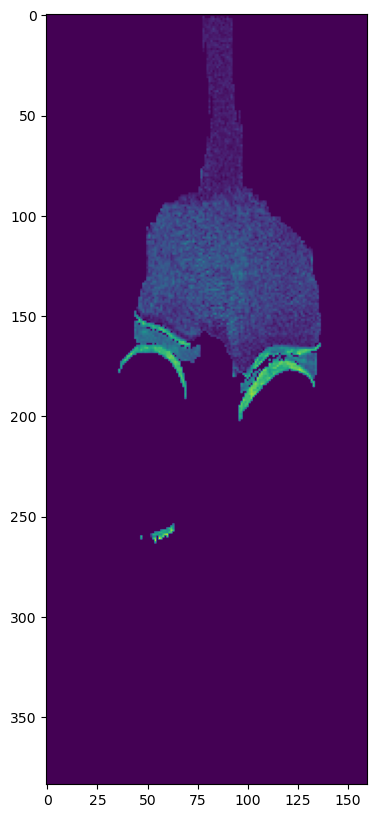

In [7]:
plt.imshow((img * (label != 0).astype(int))[:, 140, :]) 

In [12]:
data = extract_features(img, label)

In [14]:
feature = pd.DataFrame.from_dict([data])

In [15]:
feature

,image_mean_intensity,image_median_intensity,lateral_tibial_cartilage_mean_intensity,lateral_tibial_cartilage_median_intenisty,lateral_tibial_cartilage_volume,lateral_tibial_cartilage_entropy,lateral_tibial_cartilage_opening,lateral_tibial_cartilage_closing,medial_tibial_cartilage_mean_intensity,medial_tibial_cartilage_median_intenisty,...,lateral_meniscus_volume,lateral_meniscus_entropy,lateral_meniscus_opening,lateral_meniscus_closing,medial_meniscus_mean_intensity,medial_meniscus_median_intenisty,medial_meniscus_volume,medial_meniscus_entropy,medial_meniscus_opening,medial_meniscus_closing
0,51.132406,37.0,163.793388,166.0,9922,7.271218,4914,269,152.464133,154.0,...,9716,6.673862,1993,216,100.372715,98.0,8972,6.350602,2762,385


In [30]:
label = "P01KRSL" # TKR left knee
labels_path = "../OAIdata21/AllClinical00.txt"
data = pd.read_csv(labels_path, sep="|")
data[["ID", label]]

,ID,P01KRSL
0,9000099,0: No
1,9000296,0: No
2,9000622,.: Missing Form/Incomplete Workbook
3,9000798,0: No
4,9001104,.: Missing Form/Incomplete Workbook
...,...,...
4791,9999365,.: Missing Form/Incomplete Workbook
4792,9999510,0: No
4793,9999862,.: Missing Form/Incomplete Workbook
4794,9999865,.: Missing Form/Incomplete Workbook


In [ ]:
checkpoint_path = "/Users/niklas/Desktop/"